In [ ]:
# Exercise sheet 4 with the songs.csv, containing the lyrics of songs found on Spotify ranging since 1980. Load the data set into your console.

# Task 1
# Load the data set into your console.
# We will now perform an elementary sentiment analysis. We will analyze, how positive or neg- ative the mood in these song texts is and how it changes across time.

In [1]:
#Task 1: Load the Dataset First, we need to load the songs.csv file into our console.
# option 1

import pandas as pd

# Load the dataset
songs_df = pd.read_csv('/Users/oayanwale/Downloads/NLP_Exercise_24_25/Data/songs.csv')

# Display the first few rows of the dataframe
print(songs_df.head())

   Unnamed: 0                name                   artists  year  \
0           3           Mic Check  Rage Against The Machine  1999   
1           6      Born As Ghosts  Rage Against The Machine  1999   
2          12           Bombtrack  Rage Against The Machine  1992   
3          17     Know Your Enemy  Rage Against The Machine  1992   
4          20  Township Rebellion  Rage Against The Machine  1992   

                                                text  
0  Oh Wait a minute now  \nHa ha ha  \nCome on  \...  
1  The hills find peace  \nLocked armed guard pos...  
2  Ughh!  \nHey yo, it's just another bombtrack u...  
3  Huh!  \nYeah, we're comin' back then with anot...  
4  Rebel, rebel and yell  \n'Cause our people sti...  


In [2]:
#option 2

import pandas as pd

# Define the file path
data_folder = "/Users/oayanwale/Downloads/NLP_Exercise_24_25/Data/"
songs_path = f"{data_folder}/songs.csv"

# Load dataset
songs_df = pd.read_csv(songs_path)

# Display basic info
print(songs_df.head())
print(songs_df.info())


   Unnamed: 0                name                   artists  year  \
0           3           Mic Check  Rage Against The Machine  1999   
1           6      Born As Ghosts  Rage Against The Machine  1999   
2          12           Bombtrack  Rage Against The Machine  1992   
3          17     Know Your Enemy  Rage Against The Machine  1992   
4          20  Township Rebellion  Rage Against The Machine  1992   

                                                text  
0  Oh Wait a minute now  \nHa ha ha  \nCome on  \...  
1  The hills find peace  \nLocked armed guard pos...  
2  Ughh!  \nHey yo, it's just another bombtrack u...  
3  Huh!  \nYeah, we're comin' back then with anot...  
4  Rebel, rebel and yell  \n'Cause our people sti...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5087 non-null   int64 
 1   name        5087 non-nul

# Task 2
# Apply preprocessing to the given texts. Keep in mind, that we intend to use sentiment dictionar- ies to analyze the text later. How does this knowledge change your approach to preprocessing?

# Task 2: Preprocess the Texts
# For sentiment analysis, we need to preprocess the song lyrics. This involves cleaning up text while considering that we'll be using a sentiment dictionary later.

# Considerations for Preprocessing:
* Lowercasing: Convert all text to lowercase.
* Removing Punctuation and Numbers: Keep only alphabetic characters.
* Tokenization: Split lyrics into words.
* Stop Word Removal: Depending on your sentiment dictionary, you may want to keep certain common words that might carry sentiment.

In [4]:
#option 1

import re

def preprocess_text(text):
    # Remove punctuation and numbers, convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = text.lower()
    
    # Tokenize (split into words)
    words = text.split()
    
    return ' '.join(words)

# Apply preprocessing to song lyrics column (assuming it's named 'lyrics')
songs_df['cleaned_lyrics'] = songs_df['text'].apply(preprocess_text)

# Display cleaned lyrics for verification
print(songs_df[['text', 'cleaned_lyrics']].head())

                                                text  \
0  Oh Wait a minute now  \nHa ha ha  \nCome on  \...   
1  The hills find peace  \nLocked armed guard pos...   
2  Ughh!  \nHey yo, it's just another bombtrack u...   
3  Huh!  \nYeah, we're comin' back then with anot...   
4  Rebel, rebel and yell  \n'Cause our people sti...   

                                      cleaned_lyrics  
0  oh wait a minute now ha ha ha come on wait a m...  
1  the hills find peace locked armed guard posts ...  
2  ughh hey yo it s just another bombtrack ughh h...  
3  huh yeah we re comin back then with another bo...  
4  rebel rebel and yell cause our people still dw...  


# Option 2 Task 2: Preprocessing for Sentiment Analysis
Since we're using a sentiment dictionary, we must be careful with preprocessing.
Key considerations:
✅ Keep meaningful words (avoid stemming/lemmatization that might change dictionary matches).
✅ Remove punctuation and special characters.
✅ Convert text to lowercase for consistency.

In [7]:
#Option 2

import re

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = text.replace("\n", " ")  # Replace line breaks with spaces
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & special characters
    return text.strip()  # Remove extra spaces


# Apply preprocessing
songs_df["cleaned_lyrics"] = songs_df["text"].apply(preprocess_text)

# Print sample
print(songs_df[["text", "cleaned_lyrics"]].head())


                                                text  \
0  Oh Wait a minute now  \nHa ha ha  \nCome on  \...   
1  The hills find peace  \nLocked armed guard pos...   
2  Ughh!  \nHey yo, it's just another bombtrack u...   
3  Huh!  \nYeah, we're comin' back then with anot...   
4  Rebel, rebel and yell  \n'Cause our people sti...   

                                      cleaned_lyrics  
0  oh wait a minute now   ha ha ha   come on   wa...  
1  the hills find peace   locked armed guard post...  
2  ughh   hey yo its just another bombtrack ughh ...  
3  huh   yeah were comin back then with another b...  
4  rebel rebel and yell   cause our people still ...  


# Task 3
# In dictionary.csv you will find a sentiment dictionary. “Positive words” will have positive values while “Negative words” will have negative values.

# Use this dictionary to calculate the sentiment score of each text, that is sum up all sentiment values to the corresponding words in said text. A negative score will thus indicate a negative text, while a positive value will indicate a positive text.


In [9]:
# option 1

# Load the sentiment dictionary
sentiment_dict_df = pd.read_csv('/Users/oayanwale/Downloads/NLP_Exercise_24_25/Data/dictionary.csv')

# Print the first few rows and the columns of the dataframe
print(sentiment_dict_df.head())
print(sentiment_dict_df.columns)

       term  sentiment
0         a          0
1      a.d.          0
2    a.k.a.          0
3      a.m.          0
4  aardvark          0
Index(['term', 'sentiment'], dtype='object')


In [10]:
# Create a dictionary from the dataframe for easy lookup using correct column names
sentiment_dict = dict(zip(sentiment_dict_df['term'], sentiment_dict_df['sentiment']))

def calculate_sentiment_score(lyrics):
    score = 0
    for word in lyrics.split():
        if word in sentiment_dict:
            score += sentiment_dict[word]
    return score

# Calculate sentiment scores for each song's cleaned lyrics
songs_df['sentiment_score'] = songs_df['cleaned_lyrics'].apply(calculate_sentiment_score)

# Display songs with their sentiment scores for verification
print(songs_df[['cleaned_lyrics', 'sentiment_score']].head())

                                      cleaned_lyrics  sentiment_score
0  oh wait a minute now   ha ha ha   come on   wa...              -43
1  the hills find peace   locked armed guard post...              -18
2  ughh   hey yo its just another bombtrack ughh ...             -113
3  huh   yeah were comin back then with another b...              -51
4  rebel rebel and yell   cause our people still ...              -80


In [12]:
#option 2

def calculate_sentiment(text):
    words = text.split()  # Tokenize text
    score = sum(sentiment_dict.get(word, 0) for word in words)  # Sum sentiment values
    return score

# Apply sentiment scoring
songs_df["sentiment_score"] = songs_df["cleaned_lyrics"].apply(calculate_sentiment)

# Display results
print(songs_df[["cleaned_lyrics", "sentiment_score"]].head())


                                      cleaned_lyrics  sentiment_score
0  oh wait a minute now   ha ha ha   come on   wa...              -43
1  the hills find peace   locked armed guard post...              -18
2  ughh   hey yo its just another bombtrack ughh ...             -113
3  huh   yeah were comin back then with another b...              -51
4  rebel rebel and yell   cause our people still ...              -80


# Observations:
Negative Sentiment Scores: The values indicate that the lyrics generally lean towards negative sentiment, with scores ranging from -18 to -113.
Lyrics Context: The cleaned lyrics show informal language and expressions (e.g., "ha ha ha", "ugh"), which might contribute to lower sentiment scores.
Understanding the Scores: A negative score suggests that the words in those lyrics are predominantly associated with negative sentiments according to your sentiment dictionary.


# Task 4
# Plot the average sentiment value for each year in the data set in one plot to compare how the sentiment changed over the years. Interpret the resulting graph.

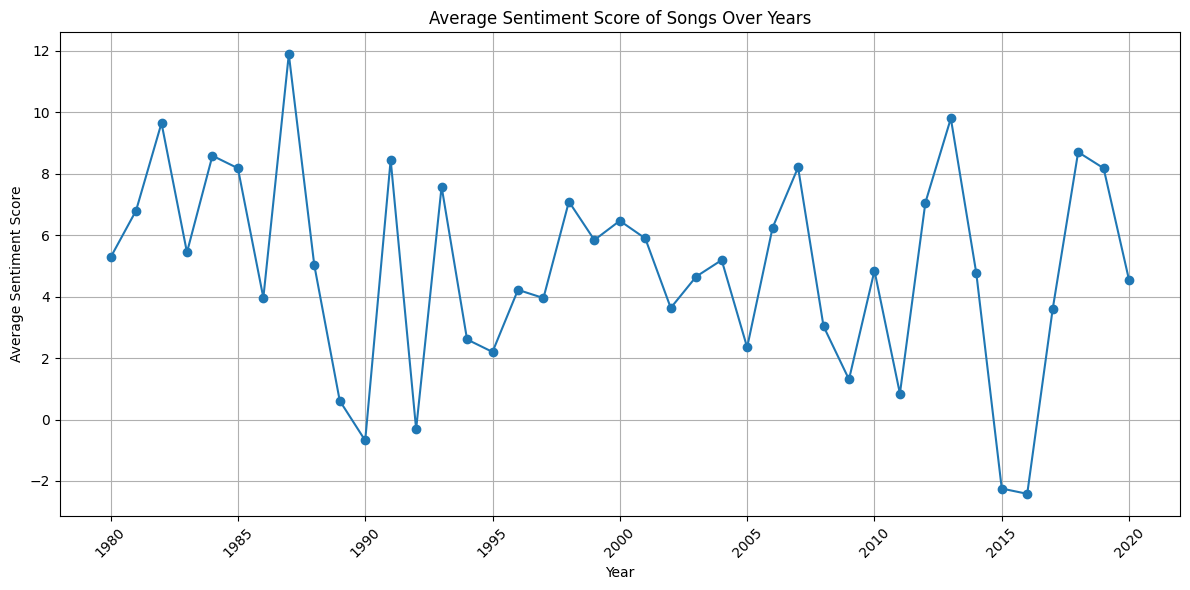

In [13]:
import matplotlib.pyplot as plt

# Ensure there is a column for year (assuming it exists)
if 'year' not in songs_df.columns:
    raise ValueError("The dataset must contain a 'year' column.")

# Group by year and calculate average sentiment score per year
average_sentiment_per_year = songs_df.groupby('year')['sentiment_score'].mean().reset_index()

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(average_sentiment_per_year['year'], average_sentiment_per_year['sentiment_score'], marker='o')
plt.title('Average Sentiment Score of Songs Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

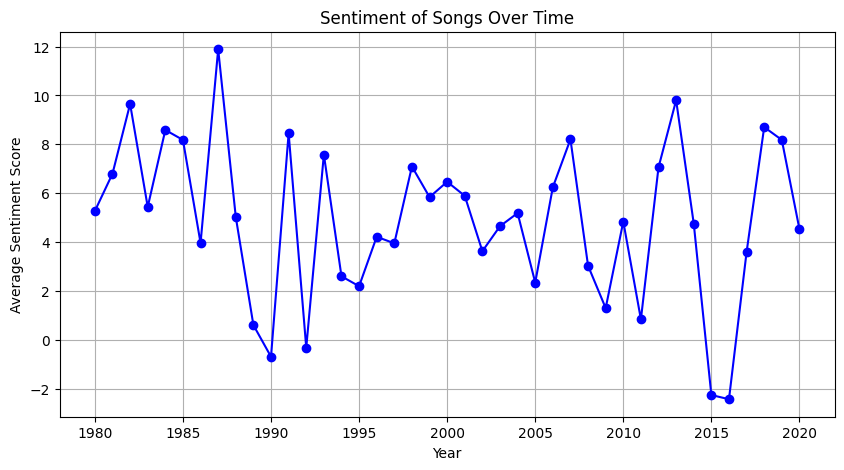

In [14]:
# option 2

import matplotlib.pyplot as plt

# Convert 'year' column to datetime (if not already)
songs_df["year"] = pd.to_datetime(songs_df["year"], format="%Y").dt.year

# Group by year and compute mean sentiment score
yearly_sentiment = songs_df.groupby("year")["sentiment_score"].mean().reset_index()

# Plot sentiment over time
plt.figure(figsize=(10, 5))
plt.plot(yearly_sentiment["year"], yearly_sentiment["sentiment_score"], marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment of Songs Over Time")
plt.grid(True)
plt.show()


# Interpretation
If the plot trends upward, song lyrics are becoming more positive over time.
If the plot trends downward, song lyrics are becoming more negative over time.
Sharp drops/spikes might indicate cultural or historical events affecting music.
